Read Data

In [ ]:
combined = True
eda_only = True
a3 = False

In [1]:
# set path

In [4]:
# read data
X_train_df = pd.read_csv(os.path.join(path, "X_train.csv"))
X_test_df = pd.read_csv(os.path.join(path, "X_test.csv"))

y_train_df = pd.read_csv(os.path.join(path, "y_train.csv"))
y_test_df = pd.read_csv(os.path.join(path, "y_test.csv"))

In [5]:
# convert everything to numpy
X_train = X_train_df.to_numpy()
X_test = X_test_df.to_numpy()

# make these 1d np arrays
y_train = y_train_df.to_numpy().reshape(-1)
y_test = y_test_df.to_numpy().reshape(-1)

In [6]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(52772, 55) (13193, 55)
(52772,) (13193,)


In [7]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([44790,  7982])),
 (array([0, 1]), array([11196,  1997])))

# Fit Models

## 1. Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

In [9]:
# Fit a model

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))
print("Test Set F1 Score Macro:", f1_score(y_test, y_pred_test, average='macro'))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92     11196
           1       0.80      0.06      0.11      1997

    accuracy                           0.86     13193
   macro avg       0.83      0.53      0.51     13193
weighted avg       0.85      0.86      0.80     13193

Test Set F1 Score Macro: 0.5143030304548124


With more hyperparameter tuning

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} :  0.51

In [10]:
# # Define the parameter grid for Random Forest
# param_grid = {
#     'n_estimators': [140,150,160,170,180,190],
#     'max_depth': [30,35,40,45],
#     'min_samples_split': [1, 2,3],
#     'min_samples_leaf': [1, 2]
# }

# # Initialize the classifier
# rf = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit GridSearchCV. Note that we're using X_train and y_train_flat
# grid_search.fit(X_train, y_train)

# # Best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Predictions and evaluation
# y_pred_test = best_model.predict(X_test)

# # Classification report
# clf_report_test = classification_report(y_test, y_pred_test)

# print("Best Hyperparameters:", best_params)

# print("Test Set Classification Report:\n", clf_report_test)
# print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
# #print f1 score weighted
# print("Test Set F1 Score Weighted:", f1_score(y_test, y_pred_test, average='macro'))



XGBoost

Grid/CV Search Results:

A3: 
param_grid = { 'n_estimators': [100, 200, 300, 400, 500],'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'max_depth': [3, 4, 5, 6, 7],'min_child_weight': [1, 2, 3, 4, 5],'subsample': [0.7, 0.8, 0.9, 1.0]} - 

     result: {'subsample': 0.8,'n_estimators': 300,'min_child_weight': 4,'max_depth': 5, 'learning_rate': 0.1}

{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1} : scale regular, 0.641 f1

{'subsample': 0.75, 'n_estimators': 290, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1} : scale:regular: 0.643


In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid based on your settings
param_grid = { 'n_estimators': [290,300],
              'learning_rate': [0.1],
                'max_depth': [6,7],
                'min_child_weight': [3,4],
                'subsample': [0.75, 0.8]}


# Calculate the scale_pos_weight for imbalanced dataset
class_count_0 = np.sum(y_train == 0) * 2
class_count_1 = np.sum(y_train == 1)
scale_pos_weight = class_count_0 / class_count_1


# Initialize the classifier
xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight)

# Option 1: Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, scoring='f1_macro')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Option 2: RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=75, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='f1_macro')
# random_search.fit(X_train, y_train)
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Making predictions
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

print("Train Set Classification Report:\n", classification_report(y_train, y_pred_train))
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("Test Set F1 Score Macro:", f1_score(y_test, y_pred_test, average='macro'))


Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=290, subsample=0.75; total time=  35.9s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=290, subsample=0.75; total time=  36.1s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=290, subsample=0.8; total time=  36.5s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=290, subsample=0.75; total time=  36.7s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=290, subsample=0.75; total time=  36.9s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=290, subsample=0.8; total time=  37.0s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=290, subsample=0.8; total time=  37.4s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.8; total time=  38.2s
[CV] END learning_rate=0.1, max

In [12]:
report = classification_report(y_test, y_pred_test, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.933219,0.726420,0.816935,11196.000000
1,0.315989,0.708563,0.437066,1997.000000
accuracy,0.723717,0.723717,0.723717,0.723717
macro avg,0.624604,0.717491,0.627000,13193.000000
weighted avg,0.839790,0.723717,0.759435,13193.000000


#### XGBoost Feature Importances

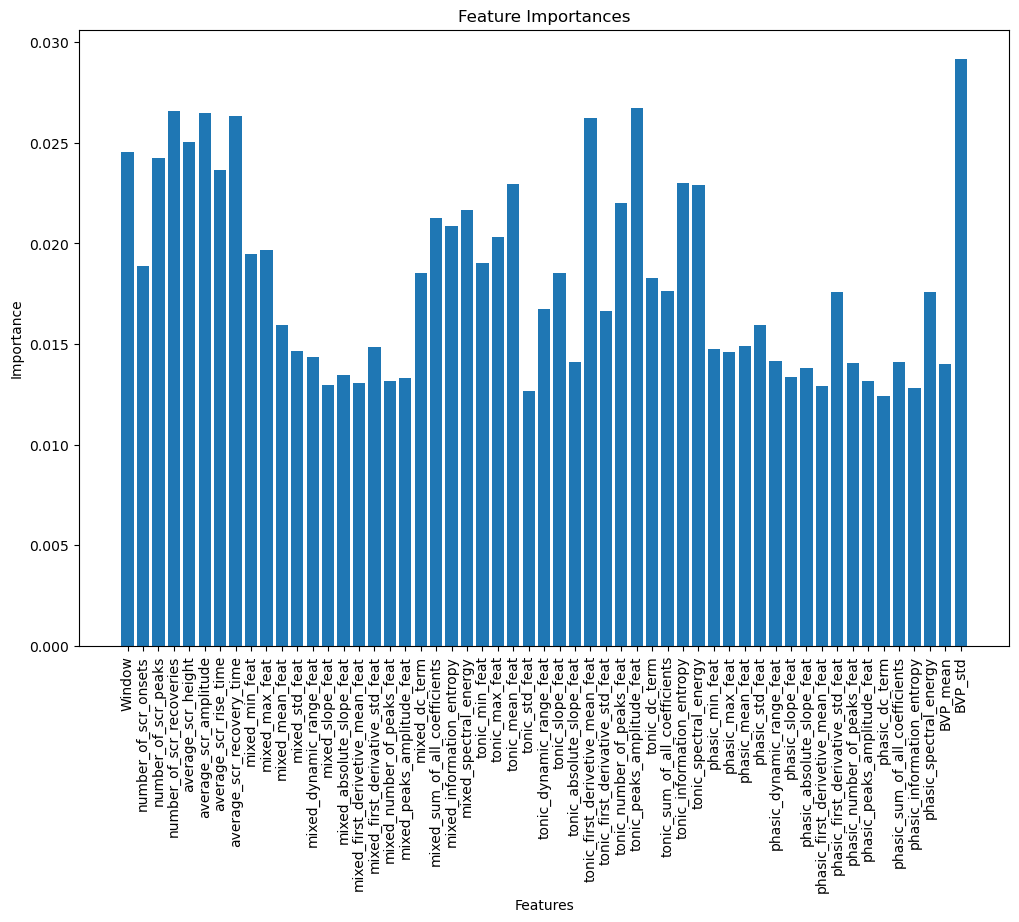

In [13]:
import matplotlib.pyplot as plt

# Feature importances from the model
feature_importances = best_model.feature_importances_

# Visualize these in a bar chart
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

X_train_df = pd.read_csv(os.path.join(path, "X_train.csv"))
plt.xticks(ticks=range(len(feature_importances)), labels=X_train_df.columns, rotation=90)
plt.show()


Shap Feature importances

In [14]:
import shap

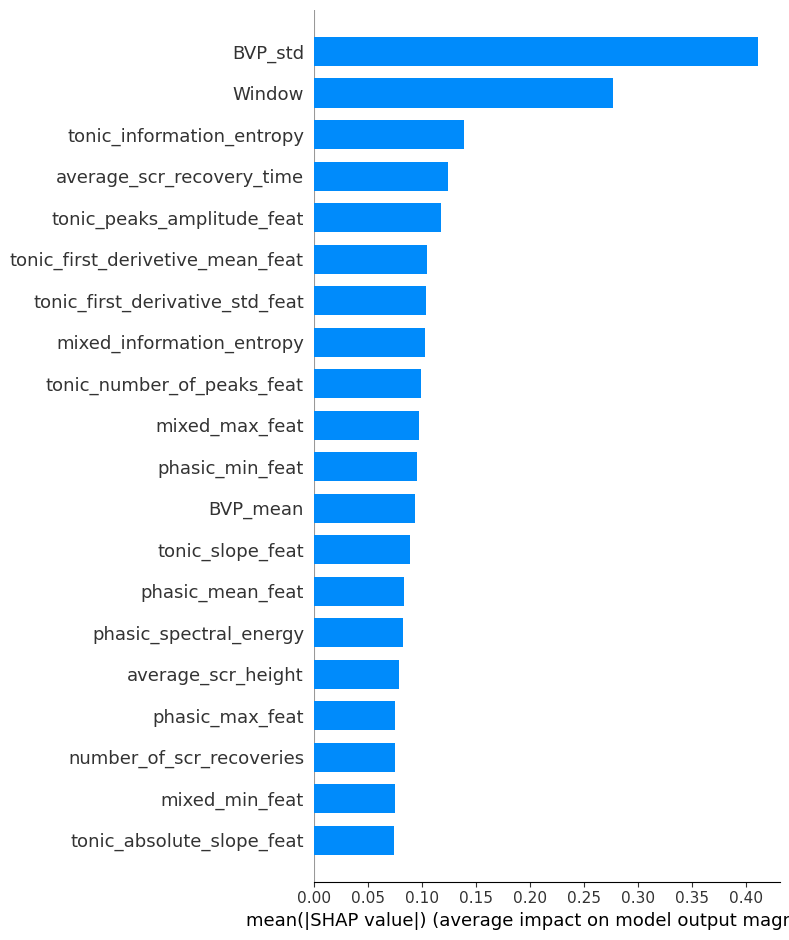

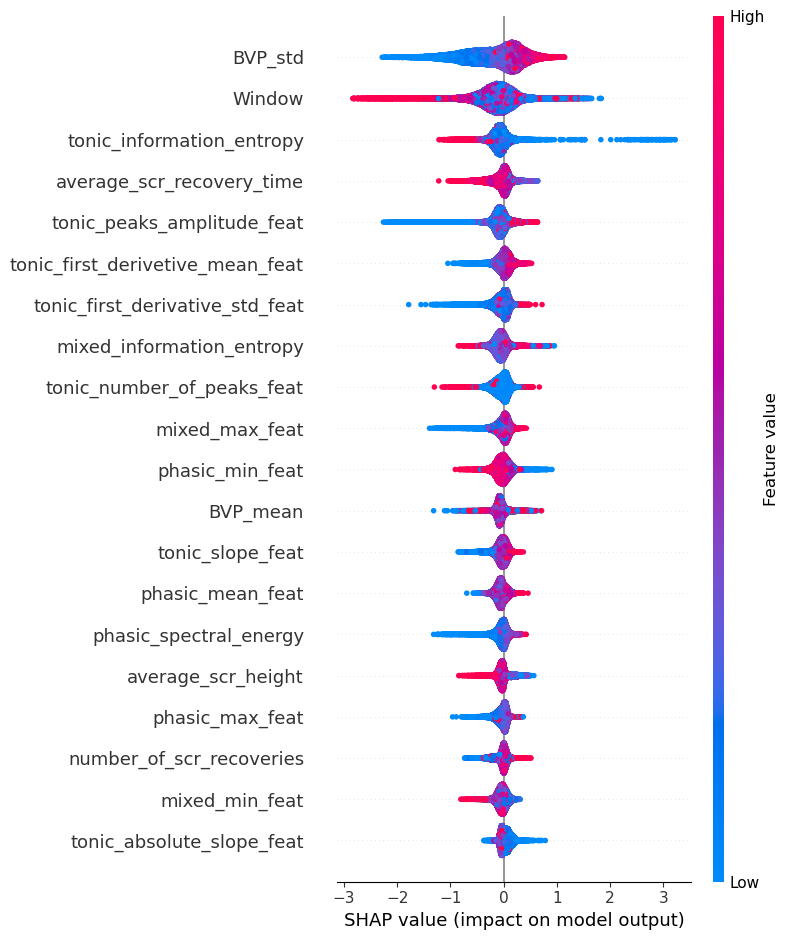

In [15]:


# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_df)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_train_df, plot_type="bar")

# Detailed SHAP value plot
shap.summary_plot(shap_values, X_train_df)

# SVC

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVC
param_grid_svc = {
    "C": [1.0],
    "kernel": ["rbf"],
    "degree": [3],
    "gamma": ["scale"],
    "shrinking": [True]
}

# Initialize the classifier
svc = SVC(random_state=42)

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=2, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_svc.fit(X_train, y_train)

# Best parameters and model
print("Best Hyperparameters for SVC:", grid_search_svc.best_params_)
print("Best Estimator for SVC:", grid_search_svc.best_estimator_)

# Making predictions
y_pred_test = grid_search_svc.best_estimator_.predict(X_test)
# print classification score
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END C=1.0, degree=3, gamma=scale, kernel=rbf, shrinking=True; total time=  21.6s
[CV] END C=1.0, degree=3, gamma=scale, kernel=rbf, shrinking=True; total time=  22.2s
Best Hyperparameters for SVC: {'C': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
Best Estimator for SVC: SVC(random_state=42)
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     11196
           1       0.00      0.00      0.00      1997

    accuracy                           0.85     13193
   macro avg       0.42      0.50      0.46     13193
weighted avg       0.72      0.85      0.78     13193



/Users/feyzjan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/feyzjan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/feyzjan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Logistic Regression

{'C': 0.001, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'} ： 0.47  

In [18]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_grid_lr = {
    "penalty": ["l2"],
    "C": [0.001, 0.01],
    "solver": ["newton-cg"],
    "max_iter": [100, 200],
    "multi_class": ["auto"]
}

# Initialize the classifier
logreg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=logreg, param_grid=param_grid_lr, cv=2, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Best parameters and model
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Estimator for Logistic Regression:", grid_search_lr.best_estimator_)

# Making predictions
y_pred_test = grid_search_lr.best_estimator_.predict(X_test)
# print classification score
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[CV] END C=0.001, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=0.001, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=0.001, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.01, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.001, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.01, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END C=0.01, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END C=0.01, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg; total time=   1.0s
Best Hyperparameters for Logistic Regression: {'C': 0.001, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator for Logistic Regression: LogisticRegression(C=0.001, rando

Dummy classifier - always 0 

In [19]:
from sklearn.dummy import DummyClassifier

# Initialize the dummy classifier
dummy_zero = DummyClassifier(strategy="constant", constant=0)

# Fit the classifier
dummy_zero.fit(X_train, y_train)

# Evaluate the classifier
print("Dummy Classifier (Always 0) Score:", dummy_zero.score(X_test, y_test))
# f1 scores
print("Dummy Classifier (Always 0) F1 Score Weighted:", f1_score(y_test, dummy_zero.predict(X_test), average='weighted'))
print("Dummy Classifier (Always 0) F1 Score Macro:", f1_score(y_test, dummy_zero.predict(X_test), average='macro'))


Dummy Classifier (Always 0) Score: 0.8486318502236034
Dummy Classifier (Always 0) F1 Score Weighted: 0.7791448763871798
Dummy Classifier (Always 0) F1 Score Macro: 0.45905941203001355


Dummy Classifier - always 50/50

In [20]:
# Initialize the dummy classifier
dummy_stratified = DummyClassifier(strategy="stratified", random_state=42)

# Fit the classifier
dummy_stratified.fit(X_train, y_train)

# Evaluate the classifier
print("Dummy Classifier (Stratified 50/50) Score:", dummy_stratified.score(X_test, y_test))
# f1 scores
print("Dummy Classifier (Stratified 50/50) F1 Score Weighted:", f1_score(y_test, dummy_stratified.predict(X_test), average='weighted'))
print("Dummy Classifier (Stratified 50/50) F1 Score Macro:", f1_score(y_test, dummy_stratified.predict(X_test), average='macro'))


Dummy Classifier (Stratified 50/50) Score: 0.7454710831501554
Dummy Classifier (Stratified 50/50) F1 Score Weighted: 0.7448911082153009
Dummy Classifier (Stratified 50/50) F1 Score Macro: 0.5023824979550348
